# Risk Ratios for Journalists

Welcome! This notebook will take you through the basics of understanding and working with risk ratios. A risk ratio is a formula that is useful across a wide variety of analyses, including vaccine effectiveness, pay-to-play meetings with politicians, employment discrimination, and TSA security screening. Although the formula is simple, there are  connections to deep topics like false positive rates, causal inferrence, and the important notion of conditional probability.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Example
A risk ratio, also called a relative risk, is the ratio of two probabilities. Each of these probabilities represents something happening to one of two groups.

We'll base our example on a type of drug that reduces heart attacks called statins, which have [similar numbers](https://researchaddict.com/statins-reduce-the-risk-of-death-heart-attacks-and-even-dementia/). Suppose that in a randomized trial we have 60 people in a control group, 4 of whom go on to have a heart attack, and 40 who take the drug, 2 of whom has a heart attack. We can draw this situation like this.

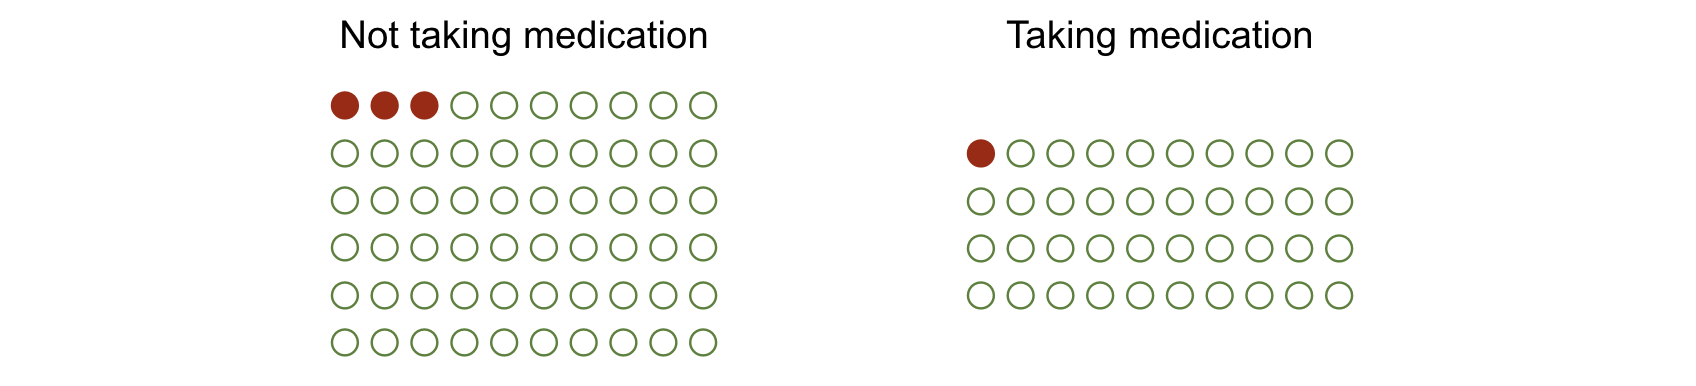

We can represent all of this information in a 2x2 table, like this. 

In [69]:
statins = pd.DataFrame({'no heart attack':[39,57],'heart attack':[1,3]}, index=['medication','no medication'])
statins

,no heart attack,heart attack
medication,39,1
no medication,57,3


This table is called a **cross table** or **contingency table**. The two groups are called various names, such as the **untreated** and **treated** groups for studies of drugs or other interventions, or sometimes **unexposed** and **exposed** when studying the effects of some risk factor.

We might naturally be interested in how much more or less likely someone taking the medication is to get a heart attack. We can't just count the number of heart attacks in each group, because the groups might be different sizes as they are here. Instead we want to compare the probability of heart attack within each group.

In [71]:
p_attack_medication = statins['heart attack']['medication'] / (statins['heart attack']['medication'] + statins['no heart attack']['medication'])
p_attack_medication

0.025

In [70]:
p_attack_no_medication = statins['heart attack']['no medication'] / (statins['heart attack']['no medication'] + statins['no heart attack']['no medication'])
p_attack_no_medication

0.05

All we are doing here is calculating the percentage of medicine takers and non-medicine takers who had a heart attack, which is why we divide by the total number of takers/non-takers in the denominators of the formulas above. 

From this, we can see that without medication there is about a 5% chance of having a heart attack, and with medication there is a 2.5% chance. We might want to have a single number that summarizes a *change in risk* for a variety of reasons, such as to compare the effect of different treatments or risk factors -- is taking this drug more or less effective than never exercising? 

The simplest way to do this would be to subtract the two probabilities:

In [72]:
p_attack_medication - p_attack_no_medication

-0.025

This is a difference of probabilities, a number known as a **risk difference** or **absolute risk reduction**. It's negative here, indicating that the risk went down. 

We might also want to ask how many times bigger one probability is than the other, which implies a division:

In [74]:
p_attack_medication / p_attack_no_medication

0.5

This, at last, the **risk ratio** or **relative risk**. It's less than one, meaning the risk was reduced.

## Definition

Given two groups and two outcomes, we can place these four numbers in a table like this:

| Group | Positive | Negative |
| - | - | - |
| Treated | a | b |
| Untreated | c | d |

Then the **risk ratio** is defined as `(a/(a+b)) / (c/(c+d))`. This is also sometimes called the **relative risk**.

We've already also seen the *risk difference* which is `(a/(a+b)) - (c/(c+d))`. There is another quantity called the *odds ratio* which is calculated as ratio of odds instead of a ratio of probabilities, that is `(a/b) / (c/d)`. In fact there are a [number of related measures](https://en.wikipedia.org/wiki/Relative_risk_reduction) one can calculate from this table, each of which can be useful in certain cases. 

We will focus mostly on the *risk ratio*, because it is a simple and versatile ratio of probabilities.


# Exercise 1: COVID vaccine risk ratio

Here's a [paper](https://www.nejm.org/doi/full/10.1056/nejmoa2035389) which reports on the phase 3 clinical trials of the Moderna vaccine. What is the risk ratio that describes the effectiveness of this vaccine? You will need to read the paper to find the four values a,b,c,d as above.

In [7]:
a = 11 # number of people who DID get the vaccine and DID get COVID
b = 15210-11 # number of people who DID get the vaccine and DID NOT get COVID
c = 185 # number of people who DID NOT get the vaccine and DID get COVID
d = 15210-185 # number of people who DID NOT get the vaccine and DID NOT get COVID

In [8]:
# Then calculate the risk ratio itself
(a/(a+b)) / (c/(c+d))

0.05945945945945945

What does it mean that this number is smaller than 1?



A much lower percentage of vaccinated people got COVID

This paper says that the vaccine "showed 94.1% efficacy at preventing Covid-19 illness." Where does this number come from?

It's one minus the risk ratio, expressed as a percentage (times 100).

# Communicating Relative Risk
How should we write about this? Relative risk is often written as *times as likely*, so in this case we could say "people who take this medicine are 0.5 times as likely to have a heart attack." 

In this case we could also go with a nice clean "half as likely," but *times* is the general case. Consider this sentence reporting a risk ratio from a 2015 [ProPublica story](https://www.propublica.org/article/deadly-force-in-black-and-white): "Young black males in recent years were at a far greater risk of being shot dead by police than their white counterparts – 21 times greater." 

You could also report the absolute risk reduction by saying "those who took the medication were 2.5% less likely to have a heart attack." This gives a different picture of what has happened to the risk. It has decreased by only a small amount, but that's because it *can't* decrease by more than the baseline of 5%.

Typically, a risk ratio is reported as *times as likely*, which implies a multiplication -- we are multiplying the risk of untreated group by the relative risk to find the risk of the treated group. Conversely, risk difference typically is reported as *less likely" or *more likely than* because it implies addition -- we add the risk difference to the untereated group to get the risk for the treated group.

You may be tempted to write "those who took the medication were 50% less likely to have a heart attack." This has a nice ring to it, and technically that 50% is a number called the **[relative risk reduction](https://en.wikipedia.org/wiki/Relative_risk_reduction)** which is just 1-risk ratio (if the risk ratio was 80% then the relative risk reduction would be 20%). However, this is confusing because "less likely" is usually used to report absolute risk reduction. Please don't do this.

Both risk ratios and risk differences are ways of summarizing a *change* in risk. They're very useful for comparing different interventions. However, neither of these numbers alone really tells the whole story.


## A simple and accurate way to report risk changes

In the heart attack example, the risk ratio was a large (far from one): people taking the medication were 0.5 times as likely to have a heart attack, or a 50% relative risk reduction. But the absolute risk reduction was small, just a few percent. This is because the absolute risk was small either way, but these two numbers can be a lot closer for common outcomes. If your probability of getting a parking ticket decreases from 70% to 30% in a different neighborhood, then the relative risk reduction is 1-30/70 = 57%, but the absolute risk reduction is 40%.

Beware of those who report [whichever number looks better](https://centerforhealthjournalism.org/2017/01/11/reporting-findings-absolute-vs-relative-risk)! A pharmacuetical company may pick the large number to report effectiveness, and the smaller number to report side effects. Another problem is that some writers might use "less likely" to report either a relative risk reduction or an absolute risk reduction. 

Fortunately, there's a simple alternative that will help both you and your readers. First, convert both the untreated and treated group to percentages, so readers don't have to work out the denominator in their heads. For our statin example that could be visualized like this:

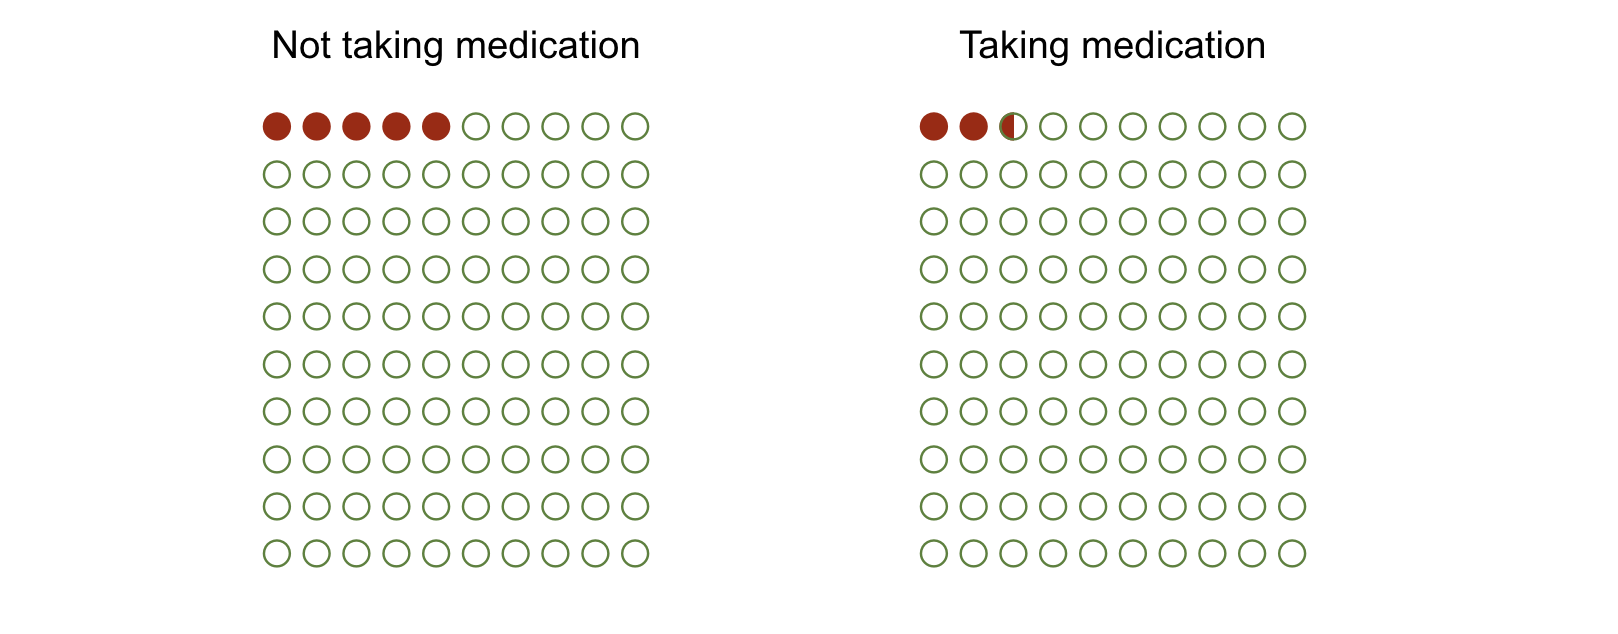

Then simply report both numbers: "2.5% of those who took the medication had a heart attack, compared to 5% of those who did not." 

While you would still want to use risk ratios to compare, say, the effectiveness of two different drugs, reporting the before and after percentages is simple, comprehensive, and easy to visualize.

**Careful with causality!** It is very tempting to write "taking the medicine reduced the risk of heart attacks from 5% to 2.5%" which means that the drug *caused* the reduction. This *might* be true, if the risk ratio was computed as part of a carefully controlled experiment, as when reporting on a scientific study. But in general, *risk ratios are statements of correlation, not causation*. We'll talk about this more below.



# The Vaccine Adverse Event Reporting System (VAERS)
## When you want a risk ratio but there's just no way

One great advantage of getting comfortable with risk ratios is being able to recognize when something should really be a risk ratio, but isn't. The logic of the 2x2 table explains why the Vaccine Adverse Event Reporting System (VAERS) database cannot be used to calculate the number deaths caused by the COVID vaccine. To be clear, there are many problems with trying to use this data to count deaths. For one thing, it's an open database and only collects reports of "adverse reactions"*after* vaccinations -- no attempt is made to determine causality at this stage. As this [article](https://www.nebraskamed.com/COVID/does-vaers-list-deaths-caused-by-covid-19-vaccines) notes,

>VAERS is like the Wikipedia of data reporting. Anyone can report anything. Many reports are helpful. Some reports are nonsense – to prove the point, one anesthesiologist successfully submitted a VAERS report several years ago that the flu vaccine had [turned him into The Incredible Hulk](https://www.politifact.com/factchecks/2017/may/11/bill-zedler/bill-zedler-insists-program-doesnt-collect-wide-ra/). More recently, a [false report](https://www.usatoday.com/story/news/factcheck/2021/05/09/fact-check-no-evidence-2-year-old-died-covid-vaccine/4971367001/) of a 2-year-old dying from a COVID-19 vaccine was removed from VAERS because the CDC says it was "completely made up."

But even if every report was perfectly accurate, if you understand risk ratios you'll understand immediately that it's not possible to determine if vaccines increase the risk of death from this sort of data. Politifact [explains this well](https://www.politifact.com/article/2021/may/03/vaers-governments-vaccine-safety-database-critical/):

> Offit explained that four sets of data are needed to measure whether a vaccine has caused or contributed to an adverse event: vaccinated people who experienced that problem; vaccinated people who didn’t have it; unvaccinated people who had the problem; and unvaccinated people who didn’t.

In other words, VAERS tracks only one of the four numbers in the contingency table, so right away we know there's no way we can compute a relative risk of vaccination from this data alone. 


# Exercise 2: Clinton Foundation Meetings

In summer 2016 the [AP reported](https://apnews.com/article/82df550e1ec646098b434f7d5771f625) that "at least 85 of 154 people from private interests who met or had phone conversations scheduled with Clinton while she led the State Department donated to her family charity or pledged commitments to its international programs." Is this evidence that donating to the Clinton Foundation would get you a meeting with the Secretary of State?

In risk ratio terms, quid-pro-quo would mean that the "risk" (probability) of getting a meeting for people who donated is higher than for those who did not donate, i.e. the risk ratio is greater than one. Let's try to calculate it.

In [ ]:
a = 85 # number of people who DID donate and DID get a meeting
b = ??? # number of people who DID donate and DID NOT get a meeting
c = 154-85 # number of people who DID NOT donate and DID get a meeting
d = ??? # number of people who DID NOT donate and DID NOT get a meeting

It turns out we cannot calculate the risk ratio. The basic problem is that we only have information on people who met with Clinton, not people who wanted to meet with her but did not, regardless of whether they also donated to the Clinton foundation. The fact that only two numbers are reported in the story should be a clue that we can't calculate the advantage of donating -- we need four numbers to do that. (We could also calculate the advantage with two probabilities: the probability of getting a meeting if you donated, and the probability of getting a meeting if you did not.)

But surely there's still something suspicious here if so many of the meetings she took were with donors, right? It depends! In particular, it depends on what you think the missing numbers might be. In 2016 I scraped the Clinton Foundation donors list and [found](http://jonathanstray.com/what-data-cant-tell-us-about-buying-politicians) there were 4277 donors. We can use this to fill in another entry in the table, which leaves only `d` missing.

In [56]:
a = 85 # number of people who DID donate and DID get a meeting
b = 4277-85 # number of people who DID donate and DID NOT get a meeting
c = 154-85 # number of people who DID NOT donate and DID get a meeting
# d = number of people who DID NOT donate and DID NOT get a meeting

In [59]:
# function to calculate risk ratio as a function of d, 
# the number of people who DID NOT donate and DID NOT get a meeting
def clinton_rr(d):
    return (a/(a+b)) / (c/(c+d))

Let's see what happens as `d`, the number of people who did not donate and didn't get a meeting either, increases. The plot looks mostly linear because we have to go quite a long way out to find risk ratios greater than one.

<AxesSubplot:xlabel='d'>

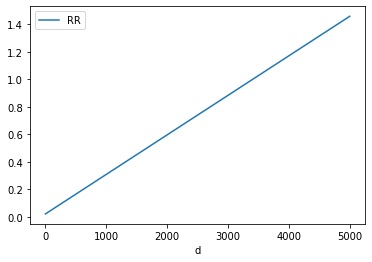

In [60]:
x = np.linspace(start=1, stop=5000)
data = pd.DataFrame({'d':x, 'RR':[clinton_rr(d) for d in x]})
data.plot(kind='line',x='d',y='RR')

In this case the risk ratio is smaller than one until d exceeds 4000 or so. Below that number, donation actually made your chances worse -- or more precisely, correlated with a lower probability of getting a meeting. We'll talk about causation a little later.

This result makes sense: we know that 85 people donated and got a meeting. The more people who wanteda meeting, did not donate and didn't get a meeting, the stronger the evidence that donation helps get a meeting. But since we don't know how many people fall into this category, it's difficult to say if donation actually helps.

# Exercise 3: Vaccine Effectivenes in Provincetown

You may remeber that the CDC released a [paper](https://www.cdc.gov/mmwr/volumes/70/wr/mm7031e2.htm) in August 2021 warning that COVID infection was still possible among the vaccinated, based on a study of a COVID outbreak in Provincetown, MA. Much of the coverage focussed on the statistic that 74% of the people who contracted COVID were vaccinated. Unfortunately, this number may give a misleading impression of vaccine effectiveness. Instead, I want you to use the data in this paper to compute the risk ratio and better understand what was happening here.

Your exercise is to compute the risk ratio of getting COVID if you are vaccinated -- so if the vaccine is preventative this number should be less than 1. It turns out every number you need is in the paper, but you will have to do a little bit of algebra to work it out.

Hint: the risk ratio can be re-expressed like this
```
rr = (cases_among_vaxxed / total_vaxxed) / (cases_among_unvaxxed / total_unvaxxed)
   = (cases_among_vaxxed / cases_among_unvaxxed ) * ( total_unvaxxed / total_vaxxed )
```

In [54]:
# These numbers are in the paper directly
cases_among_vaxxed = 346
cases_among_unvaxxed = 469-346

# There is only one more number in the paper: 69% of residents were vaccinated
# It seems like we have only three out of the four numbers we need, 
# but we only need the ratio total_unvaxxed / total_vaxxed, not the individual numbers
# And we know 69% were vaxed meaning 31% were not
(cases_among_vaxxed / cases_among_unvaxxed ) * ( 31 / 69 )

1.2638152468481207

## Relationship to Causality
Why is this number greater than one? We know from studies of the vaccine that the relative risk of getting covid should be something like 5%. But that implicitly assumes that vaccinated an unvaccinated people act the same way. Here, it's very likely they don't. This outbreak centered around July 4 and Provincetown hosts a famous gay party scene, so perhaps party-goers thought the vaccine made them immune and radically changed their behavior to be far riskier than the still unvaccinated.

The deeper problem is that we often want risk ratios to tell us about causality. After all, this is why we compute risk ratios for medicines, corruption, discrimination, and so on. But causality is complex; risk ratios can only tell us about causality if we can be sure that the untreated and treated groups are identical in every way that could matter, such as during a randomized experiment. When analyzing observational data, this is usually not the case.

# Coaches

Direct analysis

Suggest Logistic Regression

# Conditional Probability

Suppose I tell you:

- If a woman has cancer, a mammogram is positive 75% of the time
- If a woman does not have cancer, a mammogram is positive 10% of the time
- 14 of 1000 women under 50 have breast cancer

If a woman has a positive mammogram, how likely is she to have cancer?

The answer is not 75%. But to see why, and how to calculate the correct answer, we need the machinery of conditional probability.

## Probability
Probability can be thought of as nothing more than the fraction of cases where something happens.



# Bayes Theorem and The Base Rate Fallacy

Bayes Theorem
Uee it to solve the TSA example
Graph of P(terrorist|positive) vs P(positive|terrorist)


# Exercise: understanding COVID in vaccinated people

real data from somewhere